# Case Study Customer Analysis

## Load data

In [1]:
# we need to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from ipywidgets import interactive
import ipywidgets as widgets
import statsmodels.api as sm
import math

In [2]:
# We import our data from Excel file
ca_df=pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv")
ca_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer"])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    # we drop effective_to_date column
    df=df.drop(columns=['effective_to_date'])
    return df



In [4]:

def transform(df):
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df.vehicle_class[ca_df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[ca_df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df=df.drop(columns=["month","education"])
    df.number_of_policies[df.number_of_policies>2]=3
    return df


In [5]:
ca_df=clean_data(ca_df)
ca_df=transform(ca_df)


C:\Users\merce\AppData\Local\Temp/ipykernel_14304/3271366430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_claim_amount"]=round(df["total_claim_amount"],0)
C:\Users\merce\AppData\Local\Temp/ipykernel_14304/3271366430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
C:\Users\merce\AppData\Local\Temp/ipykernel_14304/3271366430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [6]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,Oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,3,0.0,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,45,0.0,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,30,2.0,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,Arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,82,4.0,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,Oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,68,0.0,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,Arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,63,0.0,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize


In [7]:
# I can see that I have a column name "unnamed=0" that duplicates the column that indicates the number of the row
list(ca_df.columns) 


['state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

## Working with Data type

In [ ]:
# checking data type of our data set
ca_df.info()
# We this function we can see the data type.
# after checkin the data. The column "number of open complaint" should not be a float.

In [ ]:
# variable "number_of_open_complaints" should not be a float number. 
# We can see that there is many NaN values in the columns.
#We cannot transform "number_of_open_complaints" into an integer because of Nan values 
#In this case, we have to replace the NaN values with "0" with replace function.


ca_df['number_of_open_complaints'] = ca_df['number_of_open_complaints'].fillna(0)






In [ ]:
# we can transform "number_of_open_complaints" into an integer

ca_df['number_of_open_complaints'] = ca_df['number_of_open_complaints'].astype('int')

In [ ]:
ca_df.info()

## Filtering data and Correcting typos

In [ ]:
# We need to standardize the text in the column "gender".

ca_df['gender'].value_counts()

In [ ]:
# number of missing values in the column "gender"

len(ca_df[ca_df['gender'].isna()==True])

In [ ]:
# with the new data set, the column text is already standardized

ca_df.gender.unique()

In [ ]:
#Let's have a look to the column "state"

ca_df['state'].value_counts()

In [ ]:
len(ca_df[ca_df['state'].isna()==True])

In [ ]:
def clean_state(x):
    if x in ['California', 'Cali']:
        return 'california'
    elif x in["Arizona","az"]:
        return 'arizona'
    elif x in ["Washington","wa"]:
         return "washington"
    elif x in ["Oregon"]:
         return "oregon"
    elif x in ["Nevada"]:
        return "nevada"
    else:
        return 'U'

In [ ]:
ca_df['state'] = list(map(clean_state, ca_df['state'])) 

In [ ]:
ca_df.state.unique()

### replace 0 for mean value

In [ ]:
# columns "income" and "number_of_open_complaints" have many "0" values. We will replace the values
ca_df['income']=ca_df['income'].replace(0,ca_df['income'].mean())
ca_df['number_of_open_complaints']=ca_df['number_of_open_complaints'].replace(0,ca_df['number_of_open_complaints'].mean())

In [ ]:
ca_df

## Removing duplicates

In [ ]:
# we have to use the function drop_duplicates()

ca_df.drop_duplicates(inplace=True)

In [ ]:
ca_df

## Replace null values

In [ ]:
# in numerical columns, we will replace the NaN values with the mean of each column
# have a loock to our numerical columns

x_df=ca_df._get_numeric_data()
x_df

In [ ]:
nulls_df = pd.DataFrame(round(x_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

In [ ]:
#There are not NaN values in the numerical columns.
# what about the categorical columns?

y_df=ca_df.select_dtypes('object')
y_df

#but we still have some missing values in the following columns: "vehicle_class" and "response"

In [ ]:
nulls_df = pd.DataFrame(round(y_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

In [ ]:
# we wll use the function fillna to replace all NaN values with "0" in the column "vehicle_class"
# we will replace the NaN values with the categorial variable "No"


ca_df['vehicle_class'] = ca_df['vehicle_class'].fillna(0)

ca_df["response"]=ca_df["response"].fillna("No")





In [ ]:
ca_df.response.value_counts()

In [ ]:
# with this function. We can see that we do not have more missing values
nulls_df = pd.DataFrame(round(ca_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

## Creating groups of data

In [ ]:
# we will create a new column called "region". This new column will represent data from column "state" as follows:

# california = West
# Oregon = North
# washington = East
# Arizona & Nevada = Central

# First, I will create a dictionary with the new labels


In [ ]:
state_labels ={
    "california":"west",
    "oregon":"north",
    "washington":"east",
    "arizona":"central",
    "nevada":"central"
}


In [ ]:
# We can use assign function to append a new column called "region"

ca_df=ca_df.assign(region=ca_df.state.map(state_labels))
ca_df

**Which columns are numerical and which columns are categorical?**

In [ ]:
# numerical columns:
ca_df._get_numeric_data()

In [ ]:
# categorical columns
ca_df.select_dtypes('object')

In [ ]:
#check again if we have some missing values
# We can see missing values in the new column "region"
nulls_df = pd.DataFrame(round(ca_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df


In [ ]:
#I replace the NaN values with "0"
ca_df['region'] = ca_df['region'].fillna(0)

In [ ]:
nulls_df = pd.DataFrame(round(ca_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

## Plots

In [ ]:
# we need the plot for the following:
# total number of responses: 

ca_df.response.value_counts()



In [ ]:
total_response =ca_df.response.value_counts()

In [ ]:
ca_df['response'].value_counts().plot(kind="bar")
plt.title("total number of responses",{"fontsize":18})

In [ ]:
# response rate by the sales channel.
ca_df.sales_channel.value_counts()

Response_rate= received answers number/ total answers
Response_rate=1466/10910


In [ ]:

response_labels ={
    "Yes":"1",
    "No":"0"
}


In [ ]:
ca_df=ca_df.assign(yes_response=ca_df.response.map(response_labels))
ca_df

In [ ]:
response_rate = ca_df.groupby(['response','sales_channel'])['yes_response'].count().reset_index()
response_rate

In [ ]:
sns.set_palette("RdYlGn")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate["sales_channel"],y=response_rate["yes_response"],hue=response_rate["response"])
ax.set_title("Response rate by channel")



In [ ]:
#Show a plot of the response rate by the total claim amount.
#I create buckets in the variable total_claim_amount
pd.cut(ca_df['total_claim_amount'],4)

In [ ]:
#I create the label for the new column total_claim_amount_binned
total_claim_amount_labels = ['Low', 'Moderate', 'High', 'Very High']
ca_df['total_claim_amount_binned'] = pd.cut(ca_df['total_claim_amount'],4, labels=total_claim_amount_labels)

In [ ]:
response_rate_c=ca_df.groupby(['response',"total_claim_amount_binned"])['yes_response'].count().reset_index()
response_rate_c

In [ ]:
sns.set_palette("colorblind")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate_c["total_claim_amount_binned"],y=response_rate_c["yes_response"],hue=response_rate_c["response"])
ax.set_title("Response rate by the total claim amount")


In [ ]:
#Show a plot of the response rate by income.
#I create buckets for the column income
pd.cut(ca_df['income'],4)

In [ ]:
income_labels = ['Low', 'Lower_middel', 'Upper_middle', 'Hight']
ca_df['income_binned'] = pd.cut(ca_df['income'],4, labels=income_labels)

In [ ]:
response_rate_i=ca_df.groupby(['response',"income_binned"])['yes_response'].count().reset_index()
response_rate_i

In [ ]:
sns.set_palette("Blues_d")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate_i["income_binned"],y=response_rate_i["yes_response"],hue=response_rate_i["response"])
ax.set_title("Response rate by income")

In [ ]:
#I want to see the relation between the variables.

sns.pairplot(ca_df)

In [ ]:
# Plot the Correlation Heatmap
#before, we can check the correlation

ca_df.corr()

In [ ]:
sns.heatmap(ca_df.corr())

In [ ]:

ca_df.corr().to_csv("correllation.csv")

## Numerical /Categorical variables

In [ ]:
#I will get the numerical columns from ca_df.
#with this columns I will create a new dataframe called numerical_df

ca_df._get_numeric_data()

In [ ]:
numerical_df=ca_df._get_numeric_data()

In [ ]:
#I do the same for categorical dataframe


In [ ]:
categorical_df=ca_df.select_dtypes('object')

### Removing outliers
We will use box plot to identify them and remove them

In [ ]:
#In oder to check the outliers we need the boxplot of the numerical columns:
X =numerical_df

X.boxplot(figsize=(14,14))

In [ ]:
# We can see the "customer_lifetime_value" has many outliers. 
# 1. We need to identify the percentile 25 and the percentile 75
# irq: interquartile range

percentile25 = X['customer_lifetime_value'].quantile(0.25)
percentile75 = X['customer_lifetime_value'].quantile(0.75)
iqr = percentile75 - percentile25

In [ ]:
# 2 Finding upper and lower limit

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
# 3 Finding Outliers
X[X['customer_lifetime_value'] > upper_limit]

X[X['customer_lifetime_value'] < lower_limit]

In [ ]:
# 4 Trimming
new_X = X[X['customer_lifetime_value'] < upper_limit]
new_X.shape

In [ ]:
# 5 Compare the plots after trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(X['customer_lifetime_value'])
plt.subplot(2,2,2)
sns.boxplot(X['customer_lifetime_value'])
plt.subplot(2,2,3)
sns.distplot(new_X['customer_lifetime_value'])
plt.subplot(2,2,4)
sns.boxplot(new_X['customer_lifetime_value'])
plt.show()

In [ ]:
# 6 Capping

new_X_cap = X.copy()
new_X_cap['customer_lifetime_value'] = np.where(
    new_X_cap['customer_lifetime_value'] > upper_limit,
    upper_limit,
    np.where(
        new_X_cap['customer_lifetime_value'] < lower_limit,
        lower_limit,
        new_X_cap['customer_lifetime_value']
    )
)

In [ ]:
# 7 Compare the plots after capping 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(X['customer_lifetime_value'])
plt.subplot(2,2,2)
sns.boxplot(X['customer_lifetime_value'])
plt.subplot(2,2,3)
sns.distplot(new_X_cap['customer_lifetime_value'])
plt.subplot(2,2,4)
sns.boxplot(new_X_cap['customer_lifetime_value'])
plt.show()

 We also have to remove the outliers from **"montly_premium_ auto"**

In [ ]:

# 1 We need to identify the percentile 25 and the percentile 75
# irq: interquartile range
percentile25 = X['monthly_premium_auto'].quantile(0.25)
percentile75 = X['monthly_premium_auto'].quantile(0.75)
iqr = percentile75 - percentile25

In [ ]:
# 2 Finding upper and lower limit

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
# 3 Finding Outliers
X[X['monthly_premium_auto'] > upper_limit]

X[X['monthly_premium_auto'] < lower_limit]

In [ ]:
# 4 Trimming
new_X = X[X['monthly_premium_auto'] < upper_limit]
new_X.shape

In [ ]:
# 5 Compare the plots after trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(X['monthly_premium_auto'])
plt.subplot(2,2,2)
sns.boxplot(X['monthly_premium_auto'])
plt.subplot(2,2,3)
sns.distplot(new_X['monthly_premium_auto'])
plt.subplot(2,2,4)
sns.boxplot(new_X['monthly_premium_auto'])
plt.show()

In [ ]:
# 6 Capping

new_X_cap = X.copy()
new_X_cap['monthly_premium_auto'] = np.where(
    new_X_cap['monthly_premium_auto'] > upper_limit,
    upper_limit,
    np.where(
        new_X_cap['monthly_premium_auto'] < lower_limit,
        lower_limit,
        new_X_cap['monthly_premium_auto']
    )
)

In [ ]:
# 7 Compare the plots after capping 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(X['monthly_premium_auto'])
plt.subplot(2,2,2)
sns.boxplot(X['monthly_premium_auto'])
plt.subplot(2,2,3)
sns.distplot(new_X_cap['monthly_premium_auto'])
plt.subplot(2,2,4)
sns.boxplot(new_X_cap['monthly_premium_auto'])
plt.show()

 We also have to remove the outliers from **"total_claim_amount"**

In [ ]:
ca_df=ca_df[ca_df["monthly_premium_auto"]<160]



In [ ]:
ca_df=ca_df[ca_df["customer_lifetime_value"]<16000]

In [ ]:
sns.boxplot(ca_df['monthly_premium_auto'])

In [9]:
X=ca_df.drop('total_claim_amount', axis=1)
Y=ca_df.total_claim_amount

In [10]:
X=X._get_numeric_data()


In [11]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,3
2,14948.0,22139,100,34.0,31,0.0,2
3,22332.0,49078,97,10.0,3,0.0,2
6,5035.0,37405,63,8.0,99,3.0,3
7,4956.0,87197,63,35.0,45,0.0,3
...,...,...,...,...,...,...,...
10902,3579.0,28304,91,10.0,30,2.0,1
10903,2772.0,59855,74,30.0,82,4.0,1
10906,5259.0,61146,65,7.0,68,0.0,3
10907,23893.0,39837,201,11.0,63,0.0,2


# Normality of the numerical variables

In [12]:
# we will use sns library to make distribution plots
fig.suptitle("Distribution plots")
sns.displot(numerical_df,x="customer_lifetime_value")
sns.displot(numerical_df, x="income")
sns.displot(numerical_df,x="monthly_premium_auto")
sns.displot(numerical_df, x="number_of_open_complaints")
sns.displot(numerical_df,x="total_claim_amount")

NameError: name 'fig' is not defined

Text(0.5, 1.0, 'total_claim_amount histogram')

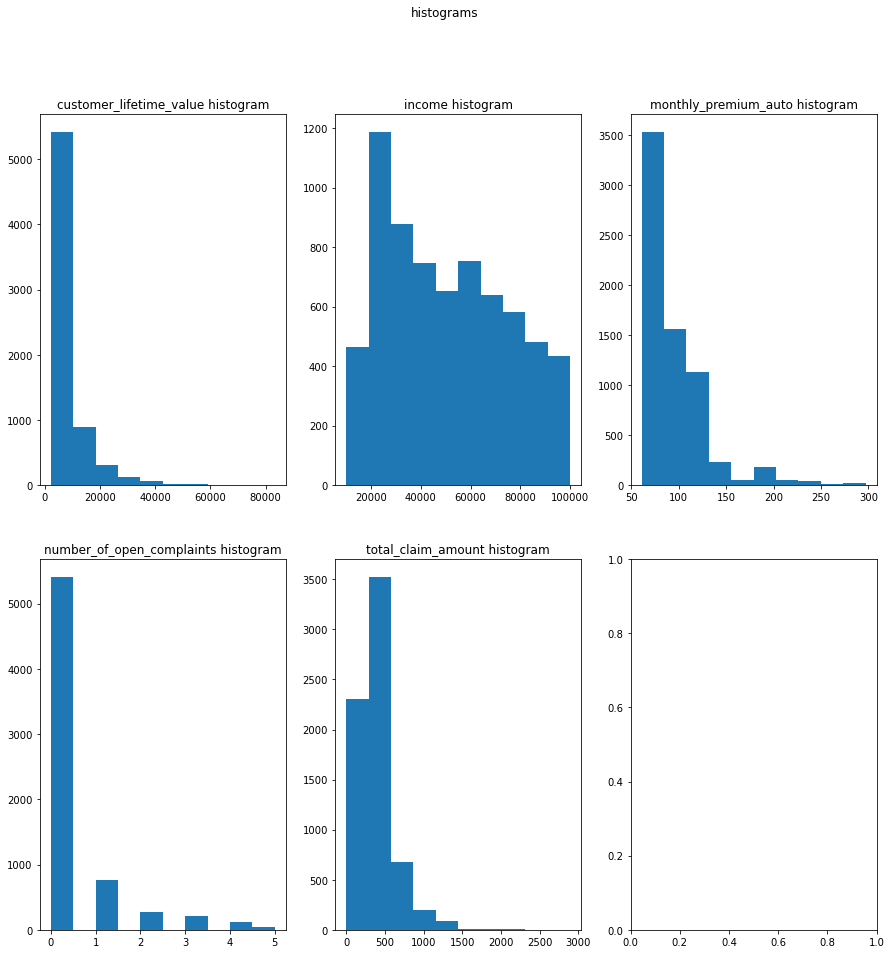

In [13]:
#use matplotlib to make histograms

fig,ax=plt.subplots(2,3,figsize=(15,15))
fig.suptitle('histograms')
ax[0,0].hist(ca_df["customer_lifetime_value"])
ax[0,0].set_title("customer_lifetime_value histogram")

ax[0,1].hist(ca_df['income'])
ax[0,1].set_title('income histogram')

ax[0,2].hist(ca_df["monthly_premium_auto"])
ax[0,2].set_title("monthly_premium_auto histogram")

ax[1,0].hist(ca_df['number_of_open_complaints'])
ax[1,0].set_title('number_of_open_complaints histogram')

ax[1,1].hist(ca_df['total_claim_amount'])
ax[1,1].set_title('total_claim_amount histogram')
    



The distribution of some numerical variables look like a normal distribution. For example:"customer lifetime value", "monthly premium auto", and "total claim amount"

In [14]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,Oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,3,0.0,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,45,0.0,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,30,2.0,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,Arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,82,4.0,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,Oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,68,0.0,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,Arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,63,0.0,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize


In [15]:
# We have to drop the columns created for plotting
ca_df.drop(["yes_response","total_claim_amount_binned","income_binned"],axis=1,inplace=True)

KeyError: "['yes_response' 'total_claim_amount_binned' 'income_binned'] not found in axis"

ca_df

In [16]:
# we use the correlation matrix to check the multicollinearity

corr = numerical_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

NameError: name 'numerical_df' is not defined

As we do not have values >0.80. I do not delete any column from numerical_df dataframe

In [ ]:
X =numerical_df
X


In [ ]:
X.hist(figsize=(14,14))

In [ ]:
# We use Power Transformation to transform all variables into normal distribution

sns.distplot((ca_df['total_claim_amount']), bins=20)

In [ ]:
pt = PowerTransformer(method="box-cox")
med_total_claim_amount_trans=pt.fit_transform(ca_df['total_claim_amount'].to_numpy().reshape(-1,1))
sns.displot(med_total_claim_amount_trans)

In [ ]:
sns.distplot((ca_df['customer_lifetime_value']), bins=20)

In [ ]:
pt = PowerTransformer(method="box-cox")
med_customer_lifetime_value_trans=pt.fit_transform(ca_df['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(med_customer_lifetime_value_trans)

In [ ]:
sns.distplot((ca_df['monthly_premium_auto']), bins=20)

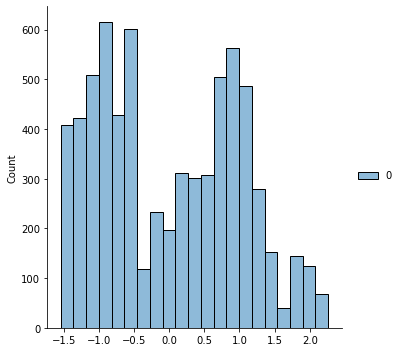

In [17]:
pt = PowerTransformer(method="box-cox")
med_monthly_premium_auto_trans=pt.fit_transform(ca_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(med_monthly_premium_auto_trans)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_open_complaints', ylabel='Density'>

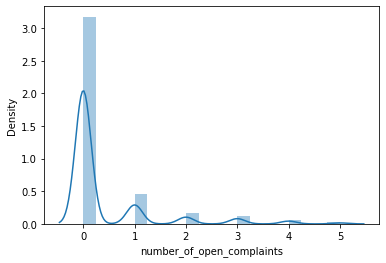

In [18]:
sns.distplot((ca_df['number_of_open_complaints']), bins=20)

In [ ]:
pt = PowerTransformer(method="box-cox")
med_number_of_open_complaints_trans=pt.fit_transform(ca_df['number_of_open_complaints'].to_numpy().reshape(-1,1))
sns.displot(med_number_of_open_complaints_trans)

In [ ]:
sns.distplot((ca_df['income']), bins=20)

In [ ]:
pt = PowerTransformer(method="box-cox")
med_income_trans=pt.fit_transform(ca_df['income'].to_numpy().reshape(-1,1))
sns.displot(med_income_trans)

In [ ]:

ca_df

In [ ]:
# We need to introduce the transform variables in the model

ca_df["med_customer_lifetime_value_trans"]= med_customer_lifetime_value_trans
ca_df["med_monthly_premium_auto_trans"]= med_monthly_premium_auto_trans
ca_df["med_number_of_open_complaints_trans"]= med_number_of_open_complaints_trans
ca_df["med_income_trans"]= med_income_trans
ca_df



In [ ]:
# We need to delete the old columns

ca_df.drop(["customer_lifetime_value"],axis=1,inplace=True)
ca_df.drop(["monthly_premium_auto"],axis=1,inplace=True)
ca_df.drop(["number_of_open_complaints"],axis=1,inplace=True)
ca_df.drop(["income"],axis=1,inplace=True)
ca_df

In [ ]:
ca_df

### Predictive Modeling

### XY split

In [19]:
X=ca_df.drop('total_claim_amount', axis=1)
Y=ca_df.total_claim_amount

In [20]:
X

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,Oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,8.0,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal,Offer2,Agent,Four-Door Car,Medsize
10903,Arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
10906,Oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,7.0,68,0.0,3,Personal Auto,Personal,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate,Offer1,Web,Luxury Car,Medsize


In [21]:
X =X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,3
2,14948.0,22139,100,34.0,31,0.0,2
3,22332.0,49078,97,10.0,3,0.0,2
6,5035.0,37405,63,8.0,99,3.0,3
7,4956.0,87197,63,35.0,45,0.0,3
...,...,...,...,...,...,...,...
10902,3579.0,28304,91,10.0,30,2.0,1
10903,2772.0,59855,74,30.0,82,4.0,1
10906,5259.0,61146,65,7.0,68,0.0,3
10907,23893.0,39837,201,11.0,63,0.0,2


In [22]:
# we get our train and test data set
X_train, X_test, y_train, y_test=train_test_split(X_scaled, Y, test_size=0.20, random_state=1000)

NameError: name 'X_scaled' is not defined

### Normalize

In [23]:
#normalize numeric features / rescaling using Normalizer


X_scaled=StandardScaler().fit_transform(X)





In [24]:
X_scaled.shape

(6817, 7)

In [25]:

type(X_scaled)

numpy.ndarray

In [26]:
#variables from X data set are now normalized. 
X_scaled

array([[-0.47797464, -0.09988327, -0.92345025, ...,  0.14940416,
        -0.4219305 ,  1.1206781 ],
       [ 0.98117693, -1.16513241,  0.20330637, ..., -0.60346471,
        -0.4219305 , -0.03457105],
       [ 2.04384338, -0.05672196,  0.11663279, ..., -1.60728987,
        -0.4219305 , -0.03457105],
       ...,
       [-0.413213  ,  0.43981827, -0.80788547, ...,  0.72301854,
        -0.4219305 ,  1.1206781 ],
       [ 2.2684943 , -0.43694472,  3.1213171 , ...,  0.54376405,
        -0.4219305 , -0.03457105],
       [ 0.55288666,  0.56526997,  1.8789957 , ..., -0.7468683 ,
         3.99804676,  1.1206781 ]])

In [27]:
# we get our train and test data set
X_train, X_test, y_train, y_test=train_test_split(X_scaled, Y, test_size=0.20, random_state=1000)

## Hot coding Categorical Variables 

In [28]:
categorical_df=ca_df.select_dtypes('object')

In [29]:
categorical_df

,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,Oregon,Yes,Extended,Employed,M,Suburban,Single,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
6,California,No,Basic,Employed,F,Urban,Married,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,No,Basic,Employed,M,Urban,Single,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,No,Extended,Employed,F,Suburban,Married,Personal Auto,Personal,Offer2,Agent,Four-Door Car,Medsize
10903,Arizona,No,Basic,Employed,M,Suburban,Married,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
10906,Oregon,No,Basic,Employed,F,Urban,Married,Personal Auto,Personal,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Employed,F,Rural,Married,Corporate Auto,Corporate,Offer1,Web,Luxury Car,Medsize


In [30]:
ca_df.drop('yes_response',axis=1, inplace=True)

KeyError: "['yes_response'] not found in axis"

In [31]:
ca_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,...,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,...,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
3,Oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,...,3,0.0,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,...,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,...,45,0.0,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,...,30,2.0,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,Arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,...,82,4.0,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,Oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,...,68,0.0,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize
10907,Arizona,23893.0,No,Extended,Employed,F,39837,Rural,Married,201,...,63,0.0,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize


In [32]:
# get dummies pandas
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

categorical_df=pd.get_dummies(categorical_df, drop_first=True)

In [33]:
categorical_df

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,1,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10903,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
10906,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
10907,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0


In [34]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,3
2,14948.0,22139,100,34.0,31,0.0,2
3,22332.0,49078,97,10.0,3,0.0,2
6,5035.0,37405,63,8.0,99,3.0,3
7,4956.0,87197,63,35.0,45,0.0,3
...,...,...,...,...,...,...,...
10902,3579.0,28304,91,10.0,30,2.0,1
10903,2772.0,59855,74,30.0,82,4.0,1
10906,5259.0,61146,65,7.0,68,0.0,3
10907,23893.0,39837,201,11.0,63,0.0,2


### apply linear regresion

modeling using statsmodels

In [35]:
X=pd.concat([X, categorical_df], axis=1) # concat numerical and categorical transformations


In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.20, random_state=1000)

In [37]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [38]:
X_train_constant= sm.add_constant(X_train)
X_test_constant= sm.add_constant(X_test)  #adding a constant
model=sm.OLS(y_train,X_train_constant).fit()
predictions=model.predict(X_test_constant)

print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     648.8
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:35:47   Log-Likelihood:                -33442.
No. Observations:                5453   AIC:                         6.696e+04
Df Residuals:                    5417   BIC:                         6.719e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [211]:
X_train_scaled_constant= sm.add_constant(X_train_scaled)
X_test_scaled_constant= sm.add_constant(X_test_scaled)  #adding a constant
model=sm.OLS(y_train,X_train_scaled_constant).fit()
predictions=model.predict(X_test_scaled_constant)

print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     486.8
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:33:14   Log-Likelihood:                -26869.
No. Observations:                4530   AIC:                         5.381e+04
Df Residuals:                    4495   BIC:                         5.403e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        342.9276      1.359    252.257      0.0

In [221]:
model.params.iloc[1:]

x1       2.591623
x2      -5.133067
x3      86.325169
x4       1.091261
x5      -1.536188
x6      -0.085721
x7      -2.470648
x8       0.108367
x9      -0.795010
x10     -0.138402
x11      0.348118
x12     -2.171022
x13      0.156390
x14      0.773475
x15     -1.134933
x16      1.486793
x17      0.413337
x18      1.626708
x19    176.369861
x20     86.376424
x21     -1.432879
x22      0.164453
x23      1.035440
x24      0.986940
x25      1.035440
x26      0.986940
x27      4.077700
x28      1.407299
x29      2.005821
x30      3.664521
x31     -0.506379
x32      1.572829
x33     -4.059457
x34      1.445479
x35      2.493556
x36      5.619512
x37      0.348118
x38     -0.138402
x39      0.108367
dtype: float64

In [222]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.params.iloc[1:]
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [223]:
features_importances 

,Attribute,Importance
x19,location_code_Suburban,176.369861
x20,location_code_Urban,86.376424
x3,monthly_premium_auto,86.325169
x36,vehicle_size_Small,5.619512
x27,renew_offer_type_Offer2,4.077700
x30,sales_channel_Branch,3.664521
x1,customer_lifetime_value,2.591623
x35,vehicle_size_Medsize,2.493556
x29,renew_offer_type_Offer4,2.005821
x18,gender_M,1.626708


# modeling using scikit Learn

In [103]:

X_train, X_test, y_train, y_test=train_test_split(X_scaled, Y, test_size=.20)



NameError: name 'X_scaled' is not defined

In [ ]:
model=LinearRegression()    # model
model.fit(X_train, y_train)  

In [ ]:
model.coef_

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

In [ ]:

result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

### now using sns

In [ ]:

sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "purple"}, line_kws={"color": "black"})

### Evaluating predictions

# ME: mean error
ME = np.mean( Y - y_pred )

### MAE: mean absolute error
MAE = np.mean( np.abs( y - y_pred ) )

In [ ]:
print(mae(y_test,y_pred))

### MSE: mean squared error
MSE = np.mean( np.power( y - y_pred , 2 ) )

In [ ]:
print(mse(y_test,y_pred))

In [ ]:
R2=r2_score(y_test,y_pred)
R2

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

In [ ]:
# MAPE: mean absolute percentual error
MAPE = np.mean( np.abs( y - y_pred) / y )